<a href="https://colab.research.google.com/github/GiselaCS/Mujeres_Digitales/blob/main/H_FAILURE%2C_Gisela_Criollo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#lectura de datos, transformación y graficos.
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.express as px


#entrenamiento de los datos y prediccion 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix


# caso de estudio 


---
Las enfermedades cardiovasculares (ECV) son la principal causa de muerte a nivel mundial , cobrando un estimado de 17,9 millones de vidas cada año , lo que representa el 31% de todas las muertes en todo el mundo .
La insuficiencia cardíaca es un evento común causado por las enfermedades cardiovasculares y este conjunto de datos contiene 12 características que pueden usarse para predecir la mortalidad por insuficiencia cardíaca.


**las 12 caracteristicas de nuestro caso de estudio son:**


*   AGE: edad del paciente 
*   ANAEMIA  (booleano): disminución anormal del número o tamaño de los glóbulos rojos. en este caso los valores a los que corresponde son: 

      "0 = NO; 1= SI"


*   CREATININE_PHOSPHOKINASE: Nivel de la enzima CPK en sangre (mcg / L), es una enzima que actúa principalmente en los tejidos musculares, en el cerebro y del corazón, siendo solicitada su medición para investigar posibles daños en estos órganos.
*   DIABETES  (booleano):  es una enfermedad en la que los niveles de glucosa (azúcar) de la sangre están muy altos. En este caso los valores a los que corresponde son: 

      "0 = NO; 1= SI"
*   EJECTION_FRACTION: Porcentaje de sangre que sale del corazón en cada contracción (porcentaje)
*   HIGH_BLOOD_PRESSURE (booleano): Si el paciente tiene hipertensión. En este caso los valores a los que corresponde son: 

      "0 = NO; 1= SI"
*   PLATELETS : Plaquetas en la sangre (kiloplaquetas / mL).
*   SERUM_CREATININE: Nivel de creatinina sérica en sangre (mg / dL),  conviene dejar claro que un valor superior a 4 mg/dl, obliga a pensar en daño renal importante. 
*   SERUM_SODIUM: Nivel de sodio sérico en sangre (mEq / L)
*   SEX: Mujer u hombre (binario), En este caso los valores a los que corresponde son: 

      "0 = FEMENINO; 1= MASCULINO"
*   SMOKING (booleano): Si el paciente fuma o no. En este caso los valores a los que corresponde son: 

      "0 = NO; 1= SI"
*   TIME (días) : Período de seguimiento.
*   DEATH_EVENT (booleano): Si el paciente falleció durante el período de seguimiento. En este caso los valores a los que corresponde son: 

      "0 = NO; 1= SI"
    


---

el evento que deseamos predecir es el "DEATH_EVENT", pues esta es la que nos indica si los pacientes fallecieron o no por insuficiencia cardiaca, por ello para el entrenamiento de los datos, retiraremos esta columna.











In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [9]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


# vamos a graficar algunos factores 

In [ ]:
hist_data =[df["age"].values]
group_labels = ['edad'] 

fig = ff.create_distplot(hist_data, group_labels)
fig.update_layout(title_text='Grafico de distribucion de edad')

fig.show()

En este caso, podemos observar que en un rango de 40 a 80 años el indicativo de un evento de muerte es mas alto, en cambio las personas menores a 40 años y mayores a 80 tienen un indicativo de muerte mas bajo.


---



In [6]:
fig = px.violin(df, y="age", x="sex", color="DEATH_EVENT", box=True, points="all", hover_data=df.columns)
fig.update_layout(title_text="Analisis en edad y genero de estado de supervivencia")
fig.show()

En el informe de edad y genero se encontro que, la propagación de supervivencia es alta en la edad de 40 a 70, tambien que la supervivencia es alta tanto para hombres de 50 a 60 años como para mujeres de 60 a 70 años respectivamente.




In [ ]:
M = df[df["sex"]==1]
F = df[df["sex"]==0]

M_survi = M[df["DEATH_EVENT"]==0]
M_not = M[df["DEATH_EVENT"]==1]
F_survi = F[df["DEATH_EVENT"]==0]
F_not = F[df["DEATH_EVENT"]==1]

labels = ['MASCULINO - SOBREVIVIO','MASCULINO - NO SOBREVIVIO', "FEMENINO -  SOBREVIVIO", "FEMENINO - NO SOBREVIVIO"]
values = [len(M[df["DEATH_EVENT"]==0]),len(M[df["DEATH_EVENT"]==1]),
         len(F[df["DEATH_EVENT"]==0]),len(F[df["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="ANALISIS DE SUPERVIVENCIA- GENERO")
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/us

respecto a la grafica, podemos decir que la taza se supervivencia es mas alta para el genero maculino respeto a las personas que tenemos en nuestro analisis de datos, aun asi por otros factores tambien podemos notar que es mas alta la cantidad de personas del genero masculino que no sobrevivieron al evento. 


---



In [ ]:
labels = ['No Diabetes','Diabetes']
diabetes_yes = df[df['diabetes']==1]
diabetes_no = df[df['diabetes']==0]
values = [len(diabetes_no), len(diabetes_yes)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="ANALISIS SOBRE DIABETES")
fig.show()

La mayoria de los pacientes no padecen de diabetes, dando un tota de 174 personas que no contaban con esta enfermedad.

In [ ]:
diabetes_yes_survi = diabetes_yes[df["DEATH_EVENT"]==0]
diabetes_yes_not_survi = diabetes_yes[df["DEATH_EVENT"]==1]
diabetes_no_survi = diabetes_no[df["DEATH_EVENT"]==0]
diabetes__no_not_survi = diabetes_no[df["DEATH_EVENT"]==1]

labels = ['Diabetico - Sobrevivio','Diabetico - No sobrevivio', 'No Diabetico  - Sobrevivio','No Diabetico - No Sobrevivio']
values = [len(diabetes_yes[df["DEATH_EVENT"]==0]),len(diabetes_yes[df["DEATH_EVENT"]==1]),
         len(diabetes_no[df["DEATH_EVENT"]==0]),len(diabetes_no[df["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="ANALISIS DE SUPERVIVENCIA- Diabetes")
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/l

respecto a lo analizado anteriormente podemos concluir que de las 174 personas no diabeticas 118 sobreviven y 56 no sobreviven, por otro lado de las 125 personas con diabetes 85 sobreviven, mientras que 40 no. 


---



In [ ]:
anaemia_yes = df[df['anaemia']==1]
anaemia_no = df[df['anaemia']==0]

labels = ['No Anemia', 'Anemia']
values = [len(anaemia_no), len(anaemia_yes)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analisis de - Anemia")
fig.show()

en nuestro analisis de datos la mayoria de personas no padecian de anemia.

In [ ]:
anaemia_yes_survi = anaemia_yes[df["DEATH_EVENT"]==0]
anaemia_yes_not_survi = anaemia_yes[df["DEATH_EVENT"]==1]
anaemia_no_survi = anaemia_no[df["DEATH_EVENT"]==0]
anaemia_no_not_survi = anaemia_no[df["DEATH_EVENT"]==1]

labels = ['Anemico - Sobrevivio','Anemico - No Sobrevivio', 'No Anemico - Sobrevivio', 'NO anemico - No Sobrevivio']
values = [len(anaemia_yes[df["DEATH_EVENT"]==0]),len(anaemia_yes[df["DEATH_EVENT"]==1]),
         len(anaemia_no[df["DEATH_EVENT"]==0]),len(anaemia_no[df["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="ANALISIS DE SUPERVIVENCIA - Anemia")
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/l

podemos concluir que en nuestro conjunto de datos, 170 de las personas no anémicas 120 sobreviven y 50 no sobreviven, por otro lado de las 129 personas anémicas, 83 sobreviven, mientras que 46 no sobreviven.


---



In [ ]:
h_yes = df[df['high_blood_pressure']==1]
h_no = df[df['high_blood_pressure']==0]

labels = ["No Hipertension","hipertension"]
values = [len(h_no), len(h_yes)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="ANALISIS DE- Hipertension")
fig.show()

el 64.9% equivalente a un total de 194 personas no sufrian de hipertension.

In [ ]:
h_yes_survi = h_yes[df["DEATH_EVENT"]==0]
h_yes_not_survi = h_yes[df["DEATH_EVENT"]==1]
h_no_survi = h_no[df["DEATH_EVENT"]==0]
h_no_not_survi = h_no[df["DEATH_EVENT"]==1]

labels = ['Hipertension - Sobrevivio','hipertension - No Sobrevivio', 'No hipertension - Sobrevivio', 'NO hipertension- No Sobrevivio']
values = [len(h_yes[df["DEATH_EVENT"]==0]),len(h_yes[df["DEATH_EVENT"]==1]),
         len(h_no[df["DEATH_EVENT"]==0]),len(h_no[df["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="ANALISIS DE SUPERVIVENCIA - hipertension")
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/l

de 194 de las personas con hipertension no alta 137 sobreviven y 57 no sobreviven, De 105 personas con hipertension alta 66 sobreviven, mientras que 39 no sobreviven.


---



In [ ]:
smoking_yes = df[df['smoking']==1]
smoking_no = df[df['smoking']==0]

labels = ['No fumadores','fumadores']
values = [len(smoking_no), len(smoking_yes)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analisis de - fumadores")
fig.show()

el 67.9 % de personas no son fumadores. 

In [ ]:
smoking_yes_survi = smoking_yes[df["DEATH_EVENT"]==0]
smoking_yes_not_survi = smoking_yes[df["DEATH_EVENT"]==1]
smoking_no_survi = smoking_no[df["DEATH_EVENT"]==0]
smoking_no_not_survi = smoking_no[df["DEATH_EVENT"]==1]

labels = ['fumadores - Sobrevivo','fumadores - No Sobrevivio', 'no fumador - Sobrevivio', 'no fumador- No sobrevivio']
values = [len(smoking_yes[df["DEATH_EVENT"]==0]),len(smoking_yes[df["DEATH_EVENT"]==1]),
         len(smoking_no[df["DEATH_EVENT"]==0]),len(smoking_no[df["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="ANALISIS DE SUPERVIVENCIA - fumadores")
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/l

en nuestro conjunto de datos, de 203 de las personas no fumadoras 137 sobreviven y 66 no sobreviven y de las 96 personas que fuman, 66 sobreviven, mientras que 30 no.


---



# comencemos con el entrenamiento de los datos.

primero vamos a ajustar las dimesiones de nuestro data frame, vamos a entregar en X, nuestras variables independientes.

In [10]:
X = np.asarray(df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 
                   'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']])
X.shape

(299, 12)

en Y vamos a entregar nuestra variable dependiente 

In [11]:
y = np.asarray(df['DEATH_EVENT'])
y.shape

(299,)

seguimos con una estandarizacion de los datos con los que vamos a entrenar al modelo.

In [12]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)
X

array([[ 1.19294523e+00, -8.71104775e-01,  1.65728387e-04, ...,
         7.35688190e-01, -6.87681906e-01, -1.62950241e+00],
       [-4.91279276e-01, -8.71104775e-01,  7.51463953e+00, ...,
         7.35688190e-01, -6.87681906e-01, -1.60369074e+00],
       [ 3.50832977e-01, -8.71104775e-01, -4.49938761e-01, ...,
         7.35688190e-01,  1.45416070e+00, -1.59078490e+00],
       ...,
       [-1.33339153e+00, -8.71104775e-01,  1.52597865e+00, ...,
        -1.35927151e+00, -6.87681906e-01,  1.90669738e+00],
       [-1.33339153e+00, -8.71104775e-01,  1.89039811e+00, ...,
         7.35688190e-01,  1.45416070e+00,  1.93250906e+00],
       [-9.12335403e-01, -8.71104775e-01, -3.98321274e-01, ...,
         7.35688190e-01,  1.45416070e+00,  1.99703825e+00]])

Entrenamiento de los datos

In [13]:
X_rest, X_test, y_rest, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_train, X_vali, y_train, y_vali = train_test_split(X_rest, y_rest, test_size=0.20, random_state=0)
#imprimimos como quedaron los datos
print('train_set :', X_train.shape, y_train.shape)
print('Test_set :', X_test.shape, y_test.shape)

train_set : (191, 12) (191,)
Test_set : (60, 12) (60,)


Entrenamiento modelo **Regresion logistica**

In [14]:
logit = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
logit

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

predecir valores de prueba

In [81]:
yhat = logit.predict(X_test)
yhat


array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

vamos a graficar una matriz de confusion para ver la prediccion de nuestro modelo entrenado 

<Figure size 432x288 with 0 Axes>

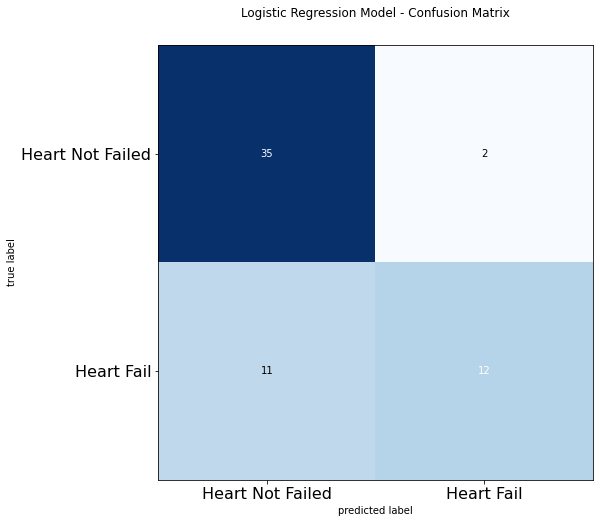

In [16]:
cm = confusion_matrix(y_test, yhat)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Logistic Regression Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

precision del modelo

In [33]:
from sklearn.metrics import precision_score
precision_score(y, logit.predict(X))


0.7640449438202247

In [34]:
#añadimos la precison a una lista
pre_list = []
pre_list.append(precision_score(y, logit.predict(X)))
pre_list

[0.7640449438202247]

Entrenamiento modelo: RandomForestClassifier

In [18]:
#random forest
model = RandomForestClassifier(random_state=42, n_estimators=100,
                               class_weight="balanced", max_features="log2")
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

predecir valores de prueba

In [78]:
rand= model.predict(X_test)
rand

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

matrix de confusion de nuestro modelo randomForest

<Figure size 432x288 with 0 Axes>

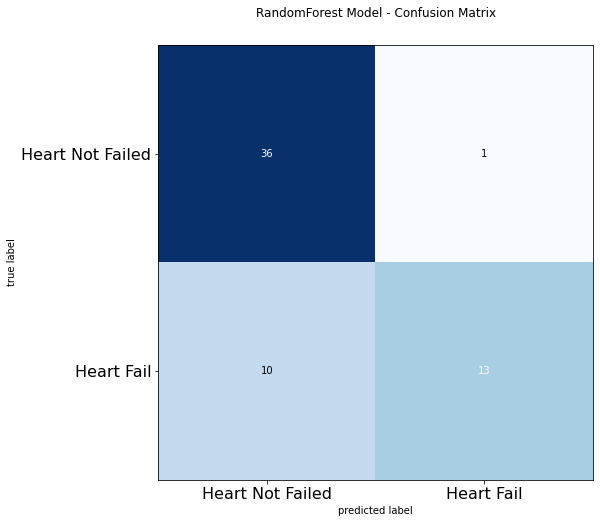

In [ ]:
cm = confusion_matrix(y_test, rand)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("RandomForest Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

precision del modelo

In [35]:
from sklearn.metrics import precision_score
precision_score(y, model.predict(X))


0.9425287356321839

In [36]:
#añadimos la precisiona una lista
pre_list.append(precision_score(y, model.predict(X)))
pre_list

[0.7640449438202247, 0.9425287356321839]

Resultados




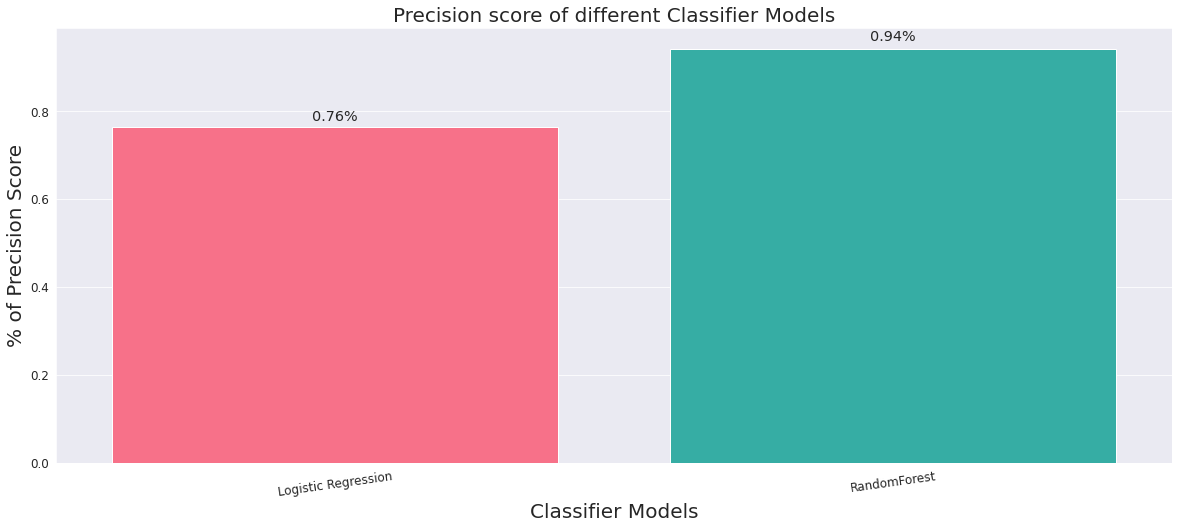

In [41]:
#creamos una lista con los nombres de nuestros modelos.
model_list= ['Logistic Regression', 'RandomForest']
#graficamos los resultados 
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=pre_list, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Precision Score', fontsize = 20)
plt.title('Precision score of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [89]:
eventoL = yhat
 
#graficamos el resultado 
death_yes = eventoL[eventoL==1]
death_no = eventoL[eventoL==0]

labels = ['No','si']
values = [len(death_no), len(death_yes)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analisis de prediccion de muerte")
fig.show()